In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, TimeDistributed, Bidirectional, LSTM
from tensorflow.keras.optimizers import RMSprop
import pyedflib as ped
import os

In [2]:
def extract(name):
    directory = "chbmit\\"+name+"\\"
    files = os.listdir(directory)
    arr, sig_headers, header = ped.highlevel.read_edf(os.path.join(directory,files[1]), ch_nrs=None, ch_names=None, digital=False, verbose=True)
    files = files[2:]
    arr = arr.astype(np.float16)
    for file in files:
        if file.endswith('.edf'):
            print(file)
            signals, sig_headers, header = ped.highlevel.read_edf(os.path.join(directory,file), ch_nrs=None, ch_names=None, digital=False, verbose=True)
            print(np.shape(signals[:23,:]))
            arr = np.append(arr,signals[:23,:].astype(np.float16),axis=1)

    arr = arr.transpose()
    np.save("data\\npy_arrays\\"+name+"new",arr)
    print(np.shape(np.load("data\\npy_arrays\\"+name+".npy")))

In [3]:
def extract_20(name):
    directory = "chbmit\\"+name+"\\"
    files = os.listdir(directory)
    arr, sig_headers, header = ped.highlevel.read_edf(os.path.join(directory,files[1]), ch_nrs=None, ch_names=None, digital=False, verbose=True)
    files = files[2:]
    arr = arr.astype(np.float16)
    arr = arr[[0,1,2,3,5,6,7,8,13,14,15,16,18,19,20,21,10,11,23,24,25,26,27],:]
    for file in files:
        if file.endswith('.edf'):
            print(file)
            signals, sig_headers, header = ped.highlevel.read_edf(os.path.join(directory,file), ch_nrs=None, ch_names=None, digital=False, verbose=True)
            print(np.shape(signals[:23,:]))
            arr = np.append(arr,signals[[0,1,2,3,5,6,7,8,13,14,15,16,18,19,20,21,10,11,23,24,25,26,27],:].astype(np.float16),axis=1)

    arr = arr.transpose()
    np.save("data\\npy_arrays\\"+name,arr)
    print(np.shape(np.load("data\\npy_arrays\\"+name+".npy")))

In [4]:
name = "chb22"
extract_20(name)

Reading Channels:   0%|          | 0/28 [00:00<?, ?it/s](23, 921600)
chb22_03.edf
Reading Channels:   0%|          | 0/28 [00:00<?, ?it/s](23, 921600)
chb22_04.edf
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 10.98it/s]
(23, 921600)
chb22_05.edf
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 11.07it/s]
(23, 921600)
chb22_06.edf
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 13.17it/s]
(23, 921600)
chb22_07.edf
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 11.12it/s]
(23, 921600)
chb22_08.edf
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 10.11it/s]
(23, 921600)
chb22_09.edf
Reading Channels: 100%|██████████| 28/28 [00:02<00:00,  9.69it/s]
(23, 921600)
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 12.38it/s]
(23, 921600)
Reading Channels: 100%|██████████| 28/28 [00:02<00:00,  9.87it/s]
(23, 924416)
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 10.97it/s]
(23, 921600)
Reading Channels: 100%|██████████| 28/28 [00:02<00:00, 11.44

In [9]:
name = "chb22"

In [6]:
print(np.shape(np.load("data\\npy_arrays\\"+name+".npy")))
# print(np.shape(arr))

(28572416, 23)


In [7]:
X = np.load("data\\npy_arrays\\"+name+".npy")

In [8]:
type(X[0][0])

numpy.float16

### chb01 - adding 2 seconds of values to make equal 5 second intervals (chb01_20 has a 48.23 period)

In [8]:
y = np.concatenate((X[:17510400,:],(np.ones((512,23))*X[17510399,:]).astype(np.float16),X[17510400:,:]))

In [9]:
np.shape(y)

(37373440, 23)

In [10]:
np.save("npy_arrays\\"+name,y)

### chb03 - removing 1 seconds of values to make equal 5 second intervals (chb03_20 has a 60.6 period)

In [8]:
y = np.concatenate((X[:18432000,:],X[18432256:,:]))

In [9]:
np.shape(y)

(35022080, 23)

In [10]:
np.save("data\\npy_arrays\\"+name,y)

### chb07 - removing 1 second intevals x3 to make equal 5 second intervals (chb07_01, chb07_13, chb07_19)

In [6]:
y = np.concatenate((X[:3689216,:],X[3689472:40272896,:],X[40273152:61795072,:]))

In [7]:
np.shape(y)

(61794560, 23)

In [13]:
np.save("data\\npy_arrays\\"+name,y)

### chb09 - removing 3,4,4,1,1,4 second intevals to make equal 5 second intervals (chb09_01,02,06,14,15,16,17)

In [10]:
y = np.concatenate((X[:2053119,:],X[2053887:5739007,:],X[5740031:20488191,:],X[20489215:49984255,:],X[49984511:53676031,:],X[53676287:57155327,:],X[57155583:57403903,:],X[57404927:,:]))

In [15]:
np.shape(y)

(62545920, 23)

In [16]:
np.save("data\\npy_arrays\\"+name,y)

### chb10 - removing 2,3,3,1 second intevals to make equal 5 second intervals (chb10_20,27,30,31)

In [8]:
y = np.concatenate((X[:31342079,:],X[31342591:36876031,:],X[36876799:40565759,:],X[40566527:42414847,:],X[42415103:,:]))

In [9]:
np.shape(y)

(46099200, 23)

In [10]:
np.save("data\\npy_arrays\\"+name,y)

### chb20 - removing 1,4,3,2,4,2 second intevals to make equal 5 second intervals (chb20_01,16,21,22,23,68)

In [5]:
y = np.concatenate((X[255:12869375,:],X[12870399:14717439,:],X[14718207:14907647,:],X[14908159:15665919,:],X[15666943:25437183,:]))

In [6]:
np.shape(y)

(25433600, 23)

In [7]:
np.save("data\\npy_arrays\\"+name,y)

### chb21 - adding 1 second of values to make equal 5 second intervals (chb21_16)

In [9]:
y = np.concatenate((X[:14745344,:],(np.ones((256,23))*X[14745343,:]).astype(np.float16),X[14745344:,:]))

In [10]:
np.shape(y)

(30256640, 23)

In [11]:
np.save("data\\npy_arrays\\"+name,y)

### chb22 - removing 1 seconds of values to make equal 5 second intervals (chb22_11)


In [10]:
y = np.concatenate((X[:10140160,:],X[10140416:,:]))

In [11]:
np.shape(y)

(28572160, 23)

In [12]:
np.save("data\\npy_arrays\\"+name,y)

In [94]:
file = "chbmit2\\chb01\\chb01_43.edf"
signals3, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.87it/s]


In [96]:
file = "chbmit2\\chb01\\chb01_46.edf"
signals4, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.70it/s]


In [78]:
file = "chbmit2\\chb01\\chb01_45.edf"
signals5, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

OSError: chbmit2\chb01\chb01_35.edf: can not open file, no such file or directory

In [79]:
file = "chbmit2\\chb01\\chb01_46.edf"
signals6, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.65it/s]


In [80]:
file = "chbmit2\\chb01\\chb01_37.edf"
signals7, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.14it/s]


In [81]:
file = "chbmit2\\chb01\\chb01_38.edf"
signals8, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 10.16it/s]


In [82]:
file = "chbmit2\\chb01\\chb01_39.edf"
signals9, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.43it/s]


In [83]:
file = "chbmit2\\chb01\\chb01_40.edf"
signals10, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.90it/s]


In [97]:
signals =  np.concatenate((signals1, signals2, signals3, signals4), axis=1) # signals6, signals7, signals8, signals9, signals10

In [98]:
np.shape(signals)

(23, 3686400)

In [105]:
header

{'technician': '',
 'recording_additional': '',
 'patientname': '',
 'patient_additional': '',
 'patientcode': '',
 'equipment': '',
 'admincode': '',
 'gender': '',
 'startdate': datetime.datetime(2076, 11, 8, 8, 15, 51),
 'birthdate': '',
 'annotations': []}

In [99]:
signals = signals.transpose()

In [100]:
type(signals[0][1])

numpy.float64

In [101]:
signals = signals.astype(np.float16)

In [102]:
np.save('sig41-46',signals)

In [103]:
np.shape(signals)

(3686400, 23)

In [106]:
X1 = np.load('sig01-10.npy')

In [107]:
X2 = np.load('sig11-20.npy')

In [108]:
X3 = np.load('sig21-30.npy')

In [109]:
X4 = np.load('sig31-40.npy')

In [110]:
X5 = np.load('sig41-46.npy')

In [112]:
X = np.concatenate((X1,X2,X3,X4,X5),axis=0)

In [114]:
X.shape

(37372928, 23)

In [115]:
np.save('chb01',X)

In [89]:
X = np.reshape(signals,(3600,1280,23)).swapaxes(1,2)

In [90]:
np.shape(X)

(3600, 23, 1280)

In [91]:
y = np.zeros((np.shape(X)[0]))

In [92]:
y.shape

(3600,)

In [93]:
np.sum(y)

0.0

In [94]:
y[2038:2047] = 2
y[1318:1327] = 1

In [95]:
y[2452:2458] = 2
y[1732:1738] = 1

In [20]:
y

array([0., 0., 0., ..., 0., 0., 0.])

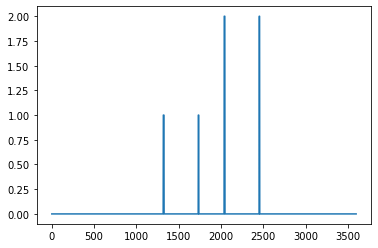

In [21]:
plt.plot(range(3600),y)
plt.show()

In [102]:
X = np.expand_dims(X,axis=3)

In [103]:
np.shape(X)

(3600, 23, 1280, 1)